## CSC 271 - Intro to Data Science
## Thurs, Jan 23
## Lesson 01
## Lists vs. arrays, statistics, and basic plotting

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import statistics as stats

Today we'll use numpy and matplotlib tools and a few functions from statistics

In [ ]:
# note: if you don't have a package installed, then you can often quickly add it through pip like the following:

!pip install matplotlib

## Task 1: Lists and Arrays -- what's the difference?

https://numpy.org/doc/stable/reference/generated/numpy.array.html

In [4]:
lst = [3, 4, 5, 6]
arr = np.array([2, 4, 6, 8])

print(type(lst))
print(type(arr))

<class 'list'>
<class 'numpy.ndarray'>


In [5]:
print('arr = ',arr)    #prints the array
print('arr+1 = ',arr+1)  #this adds one to every number in the array
print('2*arr = ',2*arr)  #multiplies each element in the array by two
print('arr**2 = ',2**arr) #exponent each element by 2
print('arr/arr = ',arr/arr) #divides an array by an array (element by element)
print('arr/max(arr) = ',arr/max(arr)) #divides the elements in the array by the maximum number in the array
print('np.sin(arr) = ',np.sin(arr)) #sin function taking the sine of the elements

# Try some of these with lists and see what happens :)

arr =  [2 4 6 8]
arr+1 =  [3 5 7 9]
2*arr =  [ 4  8 12 16]
arr**2 =  [  4  16  64 256]
arr/arr =  [1. 1. 1. 1.]
arr/max(arr) =  [0.25 0.5  0.75 1.  ]
np.sin(arr) =  [ 0.90929743 -0.7568025  -0.2794155   0.98935825]


In [6]:
# easily convert an array to a list 
list(arr)

[np.int64(2), np.int64(4), np.int64(6), np.int64(8)]

In [7]:
# easily convert a list to an array 
np.array(lst)

array([3, 4, 5, 6])

---
 Very often there are many ways to accomplish a task ... and sometimes there is a big difference in efficiency.  For numerical tasks, arrays can use *broadcasting* and *vectorization* ... leading to some great speedups.  

https://numpy.org/doc/stable/user/basics.broadcasting.html

In [10]:
# an illustration of how vectorization can speed things up
arr = np.random.rand(10000)
arr #prints the arr

array([0.72936869, 0.06086282, 0.09385946, ..., 0.07660809, 0.2128602 ,
       0.03927578], shape=(10000,))

In [13]:
%%timeit -n 100  #magic function "%%" --> python magic function
total = 0
for val in arr:
    total+=val
avg = total/len(arr)

673 μs ± 118 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [14]:
%%timeit -n 100
np.sum(arr)/len(arr)   #sum function helps to add it all up samething as the above cell.

6.84 μs ± 1.43 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)


Note: the magic command %%timeit is a nice iPython trick for timing executions

https://ipython.readthedocs.io/en/stable/interactive/magics.html#magic-timeit

## Task 2: statistics and more slicing and filtering

https://docs.python.org/3.6/library/statistics.html

In [15]:
# Let's generate some data to practice some tools with

data = np.random.randint(1,100,500)

In [16]:
# there are a ton of good tools in the statistics library

print(stats.mean(data))  #average of the data
print(stats.median(data)) #middle numbers
print(stats.mode(data))  #numbers that appears the most
print(stats.variance(data)) #this measures how spread out apart the numbers are

49
49.0
60
814


In [17]:
# peek at the first few items with a slice ...
data[:10]

array([ 6,  9, 37, 86, 80, 50, 14, 61, 52,  3], dtype=int32)

In [18]:
# use list comprehensions to do some simple filtering ...
data_even = [x for x in data if x%2==0]
data_odd = [x for x in data if x%2==1] 
print(len(data_even))
print(len(data_odd))

243
257


In [21]:
data_odd[:10]

[np.int32(9),
 np.int32(37),
 np.int32(61),
 np.int32(3),
 np.int32(17),
 np.int32(47),
 np.int32(65),
 np.int32(21),
 np.int32(9),
 np.int32(15)]

In [20]:
data_even[:10]

[np.int32(6),
 np.int32(86),
 np.int32(80),
 np.int32(50),
 np.int32(14),
 np.int32(52),
 np.int32(92),
 np.int32(24),
 np.int32(46),
 np.int32(88)]

In [24]:
#%%timeit -n 100
# here's another method of filtering ... this mode of thinking will come in handy
data_mask = data%10==0   #data masking returns true or false if the mod of the data by 10 is 0 or more
#print(data)
#print(data_mask)
print(data[data_mask]) #data mask is used as index to get numbers divisible by 10 in data, kinda like a slicing operator

[80 50 60 60 60 80 30 50 60 90 90 10 70 90 10 70 80 20 10 60 30 70 40 90
 30 60 30 80 80 30 70 30 50 10 50 20 40 90 40 90 50 60 60 90 60 50 60 60
 90 40 90 40 80 30 60 50 10 40]


## Task 3: Basic plotting using tools from matplotlib

https://matplotlib.org/stable/tutorials/index.html

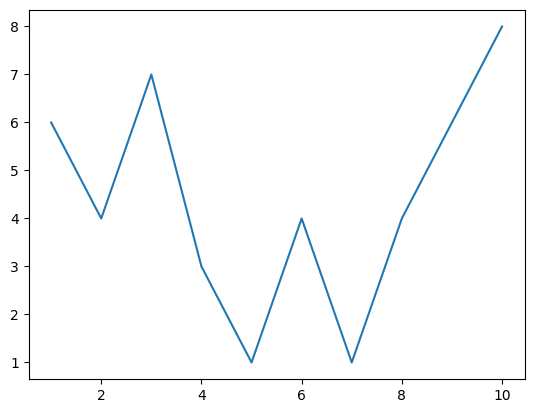

In [25]:
# we'll stick with lists for some basic plotting
x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
y = [6, 4, 7, 3, 1, 4, 1, 4, 6, 8]
p = plt.plot(x,y)
plt.show()

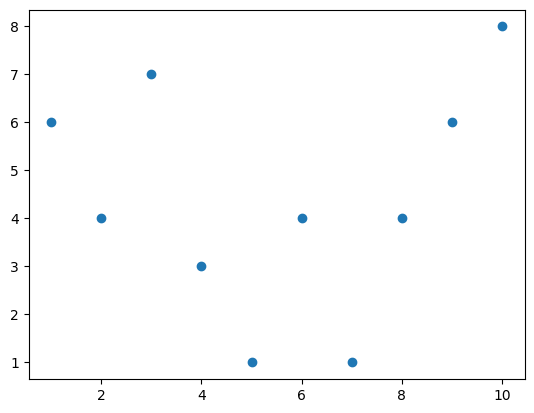

In [26]:
plt.scatter(x,y)

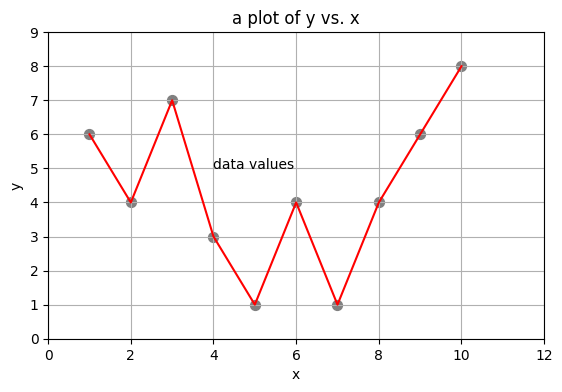

In [29]:
# there are many options we can use to make our plots nice looking ...

fig1, ax = plt.subplots(1,1)
ax.set_box_aspect(1/1.618)
plt.plot(x,y,c='red')
plt.scatter(x,y,s=50,c='gray')
plt.title('a plot of y vs. x')
plt.text(4,5,'data values')
plt.axis([0,12,0,9])
plt.grid(True)
ax.set_ylabel('y')
ax.set_xlabel('x')
plt.show()

<>:12: SyntaxWarning: invalid escape sequence '\|'
<>:12: SyntaxWarning: invalid escape sequence '\|'
C:\Users\User\AppData\Local\Temp\ipykernel_2396\2978032393.py:12: SyntaxWarning: invalid escape sequence '\|'
  plt.text(0,6,'$f(x) = x+2\|\sin(x)\|$')


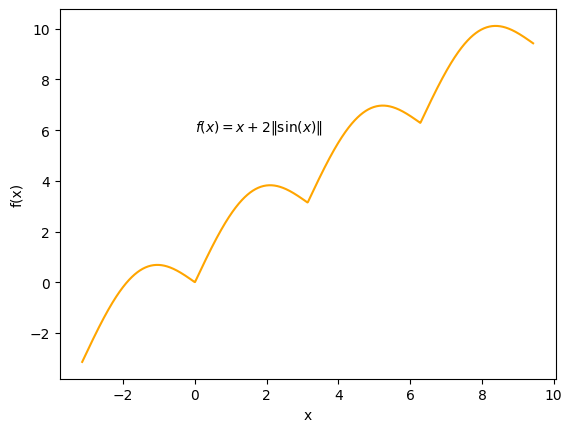

1000


In [4]:
# We can also use our own functions and numpy tools to create plots. 

def f(x_val):
    return x_val + 2*np.abs(np.sin(x_val))

pi=np.pi 
x=np.linspace(-pi,3*pi,1000) #creates evenly spaced numbers
y=f(x)

fig1, ax = plt.subplots(1,1)
plt.plot(x,y,c='orange')
plt.text(0,6,'$f(x) = x+2\|\sin(x)\|$')
ax.set_ylabel('f(x)')
ax.set_xlabel('x')
plt.show()
print(len(x))

In [31]:
# Let's go back to some random data 

data=np.random.randn(10000)
data[:20]

array([ 0.24145749,  0.86087071,  0.34854821, -0.62204151, -0.29943004,
       -0.75255723, -1.82943397,  0.4315524 , -1.58601565,  0.07128114,
       -0.09062437, -2.84101675,  0.17006935,  0.7209311 , -1.23574528,
        0.76833023,  0.41708501, -0.20820391, -1.65715247,  0.29694972])

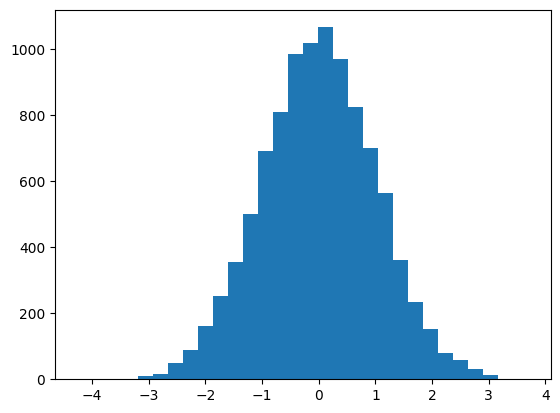

min =  -4.257208618448726
max =  3.697771107853858


In [32]:
# a basic histogram of the data
plt.hist(data,bins=30)
plt.show()

print('min = ',data.min())
print('max = ',data.max())

In [33]:
# a quick exercise ... filter and count extreme values 

data_outliers = [x for x in data if x>3 or x<-3]

num_outliers = len(data_outliers)
num_total = len(data)

print(' About',100*num_outliers/num_total,'% of the values are more than 3 standard deviations from the mean')

 About 0.2 % of the values are more than 3 standard deviations from the mean


In [34]:
# a similar approach using a mask

mask = (data>-1) & (data<1)

data_mid=data[mask]
num_middle = len(data_mid)
num_total = len(data)

print(' About',100*num_middle/num_total,'% of the values are within 1 standard deviation from the mean')

 About 67.78 % of the values are within 1 standard deviation from the mean


## Task 4: Computing and visualizing a Random Walk